In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))
import nbimporter

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from preprocessing.feature_engineering import Preprocessor

In [3]:
df = pd.read_csv('../data/mall_customers.csv')
preprocessor = Preprocessor(df)
preprocessed_df = preprocessor.transform(True)

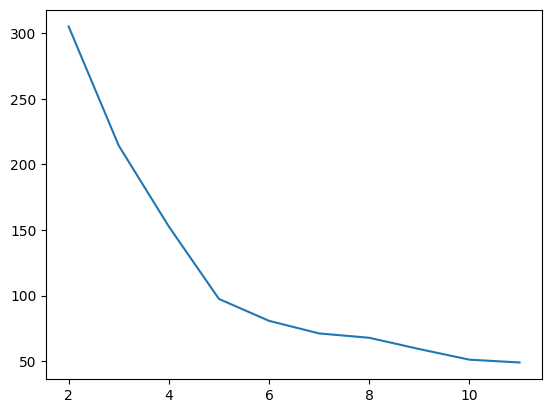

In [4]:
cost = []
for k in range(2, 12):
    kprototype_model = KPrototypes(n_clusters=k)
    kprototype_predict = kprototype_model.fit_predict(preprocessed_df, categorical = [2])
    cost.append(kprototype_model.cost_)

plt.plot(np.arange(2,12), cost, '-')


In [5]:
kprototype_model = KPrototypes(n_clusters=5)
kprototype_predict = kprototype_model.fit_predict(preprocessed_df, categorical = [2])
kprototype_model.cost_

97.40721950868533

To better compare between models I used the silhouette score calculated on the numerical columns of the dataframe trained with KPrototypes which is the same as KMean score

In [6]:
silhouette_score(preprocessed_df.drop(columns='Gender'), kprototype_predict)

0.5674183619384842

As the cost chart shows, the K-Prototypes model cost decreases as k increases, but the silhouette score decreases because the clusters become less distinct and start to overlap as k grows

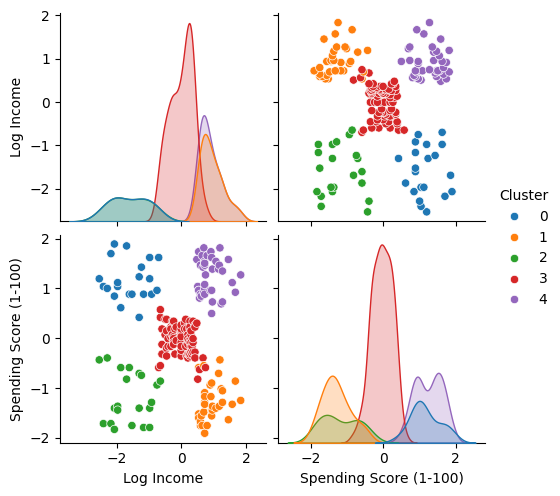

In [7]:
preprocessed_df['Cluster'] = kprototype_predict
sns.pairplot(preprocessed_df, hue="Cluster", palette="tab10")